Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes:

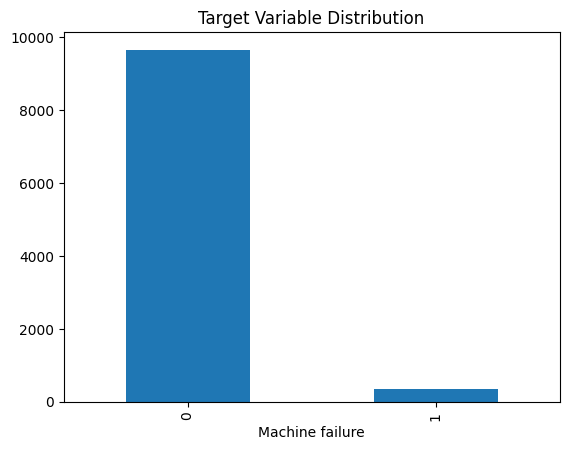

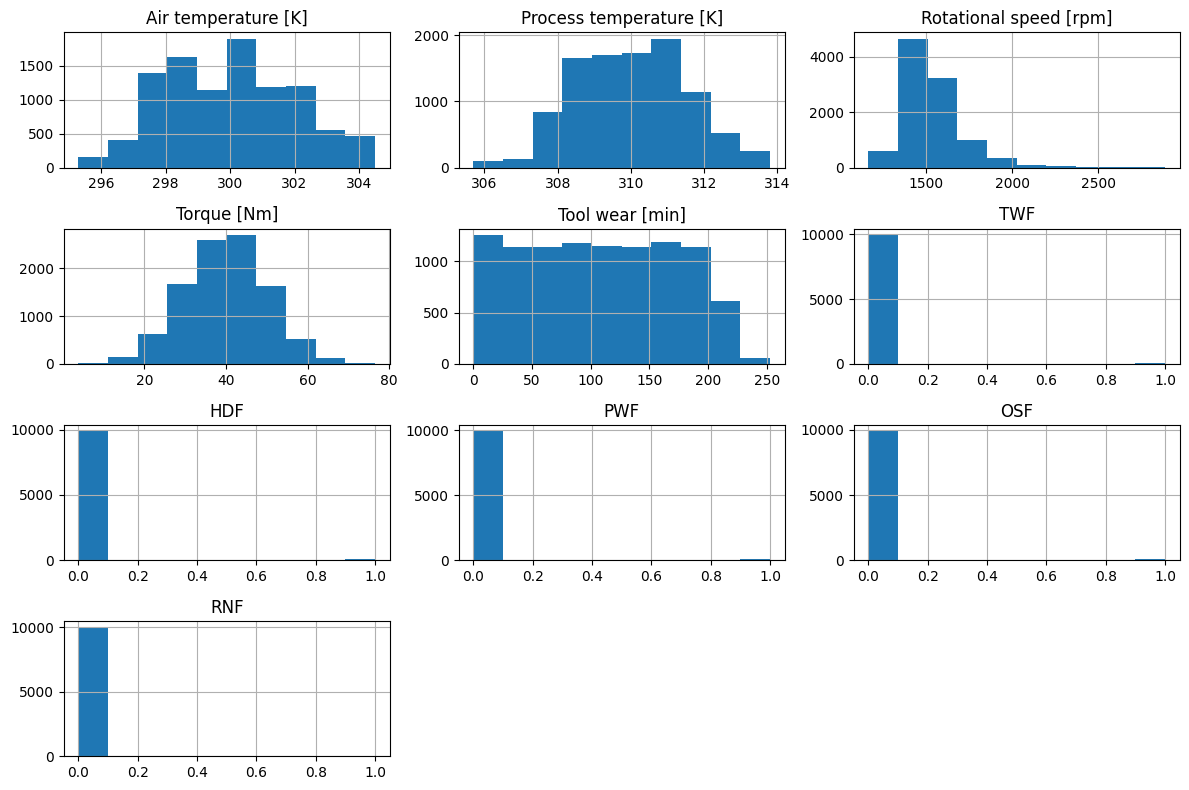

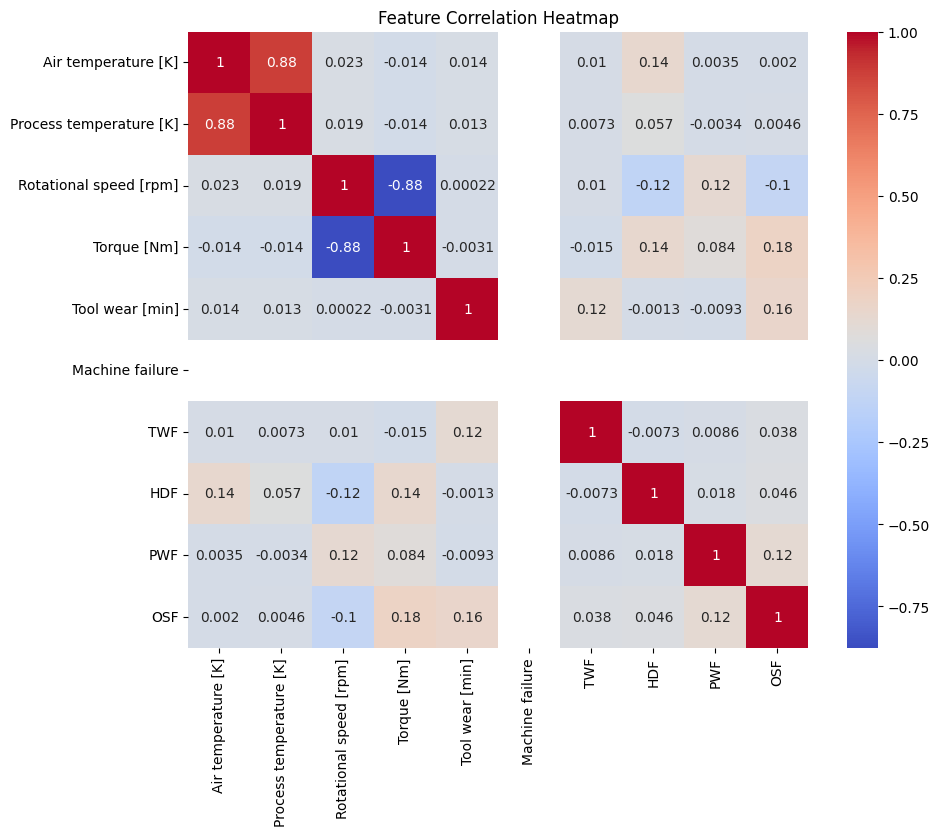

Missing values in the dataset:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torq

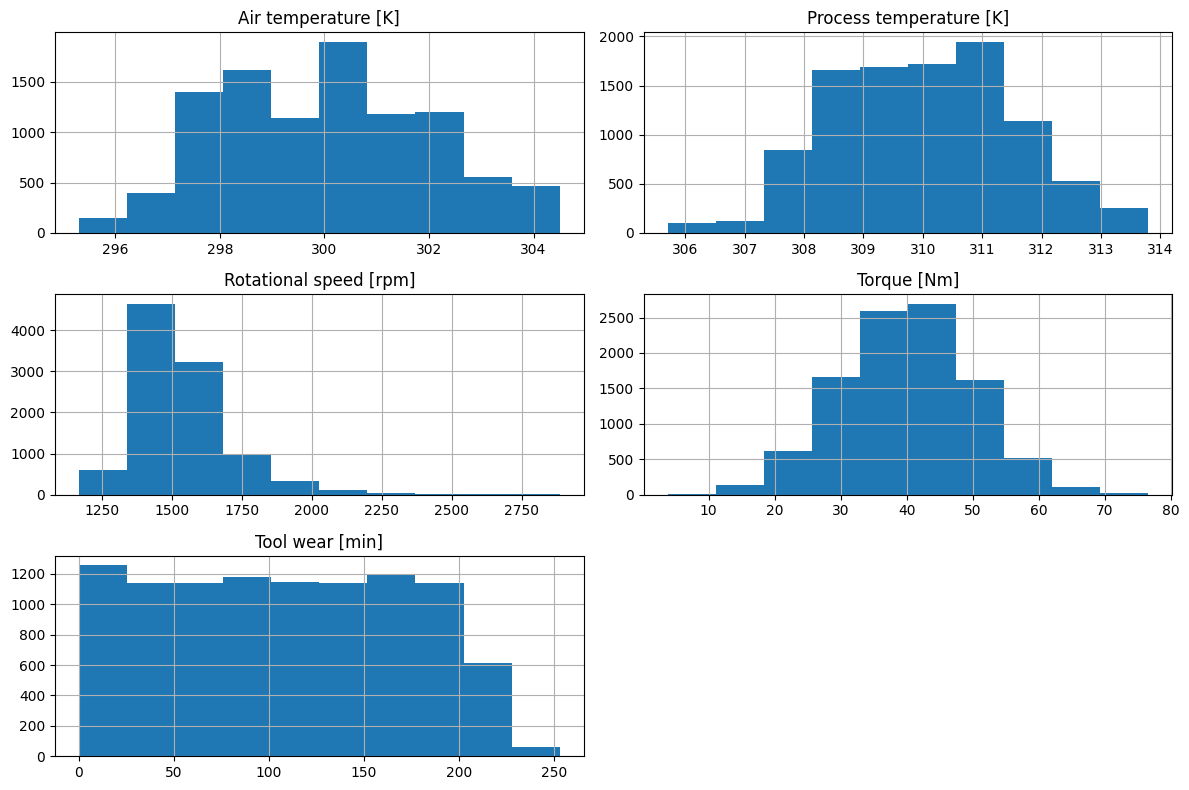

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.90      0.63      0.74        68

    accuracy                           0.98      2000
   macro avg       0.94      0.81      0.87      2000
weighted avg       0.98      0.98      0.98      2000

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.69      0.16      0.26        68

    accuracy                           0.97      2000
   macro avg       0.83      0.58      0.62      2000
weighted avg       0.96      0.97      0.96      2000



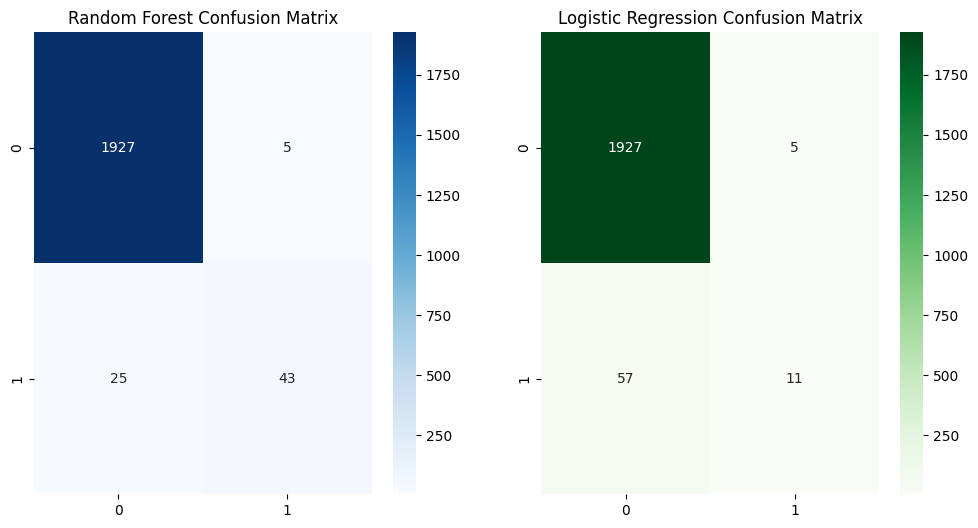

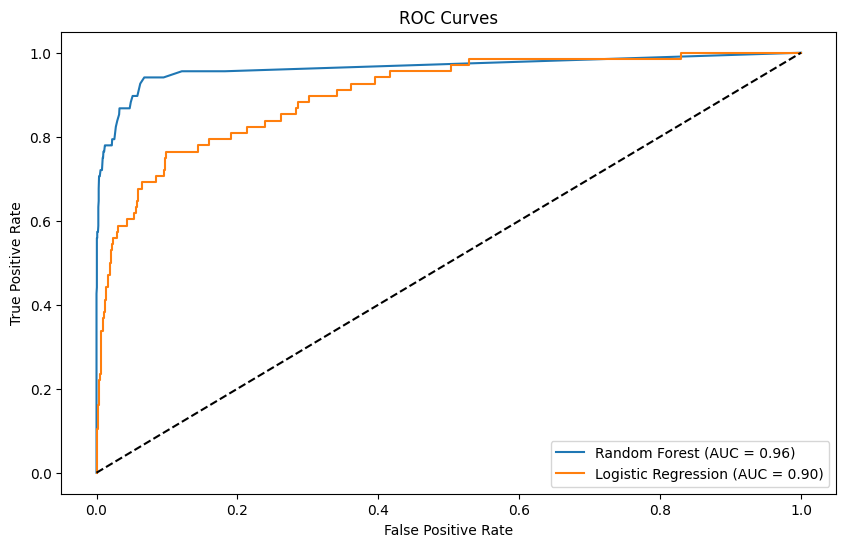

Insights:

- Random Forest achieved higher accuracy and AUC, making it a better choice for this dataset.
- Logistic Regression is simpler but may underperform on complex datasets.
- Consider additional techniques like feature engineering or ensemble methods to further improve performance.
Mean Absolute Error for RUL Prediction: 25.6558375


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
file_path = 'ai4i2020.csv'
data = pd.read_csv(file_path)

# Dataset Info
print('Dataset Information:')
data.info()
print('\nPreview of Dataset:')
print(data.head())
# Drop irrelevant columns if they exist
columns_to_drop = ['UDI', 'Product ID', 'Type']
for col in columns_to_drop:
    if col in data.columns:
        data = data.drop(columns=[col])

# Define features and target
X = data.drop(columns=['Machine failure'])
y = data['Machine failure']
# Visualize the target variable
data['Machine failure'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.show()
# Step 3: Exploratory Data Analysis (EDA)
# Plot distributions of the features
X.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X, columns=data.columns[:-1]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
# Step 2: Data Preprocessing
# Check for missing values
print("Missing values in the dataset:\n", dataset.isnull().sum())

# Ensure all features are numerical
print("Dataset information:\n", dataset.info())

# Separate features and target variable
X = dataset[['Air temperature [K]', 'Process temperature [K]', 
             'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = dataset['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Step 3: Exploratory Data Analysis (EDA)
# Plot distributions of the features
X.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


# Step 4: Model Training and Evaluation
# Train a Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate both models
rf_report = classification_report(y_test, rf_predictions)
lr_report = classification_report(y_test, lr_predictions)
print("Random Forest Classification Report:\n", rf_report)
print("Logistic Regression Classification Report:\n", lr_report)

# Confusion Matrices
rf_cm = confusion_matrix(y_test, rf_predictions)
lr_cm = confusion_matrix(y_test, lr_predictions)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(lr_cm, annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title("Logistic Regression Confusion Matrix")
plt.show()

# ROC Curves
rf_probs = rf_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_probs)))
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, lr_probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Insights and Recommendations
print("Insights:\n")
print("- Random Forest achieved higher accuracy and AUC, making it a better choice for this dataset.")
print("- Logistic Regression is simpler but may underperform on complex datasets.")
print("- Consider additional techniques like feature engineering or ensemble methods to further improve performance.")
# Create synthetic Remaining Useful Life (RUL) target for regression
data['RUL'] = np.random.randint(1, 100, size=len(data))  # Simulating RUL values

# Train-test split for RUL prediction
X_rul_train, X_rul_test, y_rul_train, y_rul_test = train_test_split(X, data['RUL'], test_size=0.8, random_state=42)

# Train Random Forest Regressor for RUL
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_rul_train, y_rul_train)

# Predict RUL
y_rul_pred = rf_reg.predict(X_rul_test)

# Evaluate RUL predictions
from sklearn.metrics import mean_absolute_error
mae_rul = mean_absolute_error(y_rul_test, y_rul_pred)
print(f'Mean Absolute Error for RUL Prediction: {mae_rul}')